Файл загружен

     Unnamed: 0  dbh     wood    bark    root   rootsk  branch  \
0             1   90   5528.0     NaN   460.0      NaN     NaN   
1             2  106  13650.0     NaN  1500.0   665.00     NaN   
2             3  112  11200.0     NaN  1100.0   680.00     NaN   
3             4   34   1000.0     NaN   430.0    40.00     NaN   
4             5  130      NaN     NaN  3000.0  1030.00     NaN   
5             6   86   7027.0     NaN   550.0   290.00    94.0   
6             7   39   1086.0     NaN   220.0    48.00     NaN   
7             8   50      NaN     NaN   524.0    74.00     NaN   
8             9   30      NaN     NaN   150.0    27.00     NaN   
9            10   39      NaN     NaN   245.0    28.00     NaN   
10           11  103  15396.0  1800.0  1400.0   653.00     NaN   
11           12   50   3047.0     NaN   240.0    98.00    83.0   
12           13  110  17841.0     NaN  2000.0   474.00     NaN   
13           14   77      NaN     NaN   600.0   280.00     Na

,Unnamed: 0,dbh,wood,bark,root,rootsk,branch,species,fac26
0,1,90,5528.0,328.0,460.0,11.0,35.0,E. maculata,z
1,2,106,13650.0,328.0,1500.0,665.0,35.0,E. pilularis,2
2,3,112,11200.0,328.0,1100.0,680.0,35.0,E. pilularis,2
3,4,34,1000.0,328.0,430.0,40.0,35.0,E. pilularis,2
4,5,130,162.0,328.0,3000.0,1030.0,35.0,E. maculata,z


        Unnamed: 0         dbh          wood         bark         root  \
count   153.000000  153.000000    153.000000   153.000000   153.000000   
unique         NaN         NaN           NaN          NaN          NaN   
top            NaN         NaN           NaN          NaN          NaN   
freq           NaN         NaN           NaN          NaN          NaN   
mean     77.000000   26.352941   1385.117647   348.581699   144.547059   
std      44.311398   28.273679   3823.808932   213.349498   411.359609   
min       1.000000    3.000000      3.000000     7.000000     0.300000   
25%      39.000000    8.000000     35.000000   328.000000    41.000000   
50%      77.000000   15.000000    162.000000   328.000000    41.000000   
75%     115.000000   36.000000    560.000000   328.000000    41.000000   
max     153.000000  145.000000  25116.000000  1808.000000  3000.000000   

             rootsk      branch       species fac26  
count    153.000000  153.000000           153   153  
uni

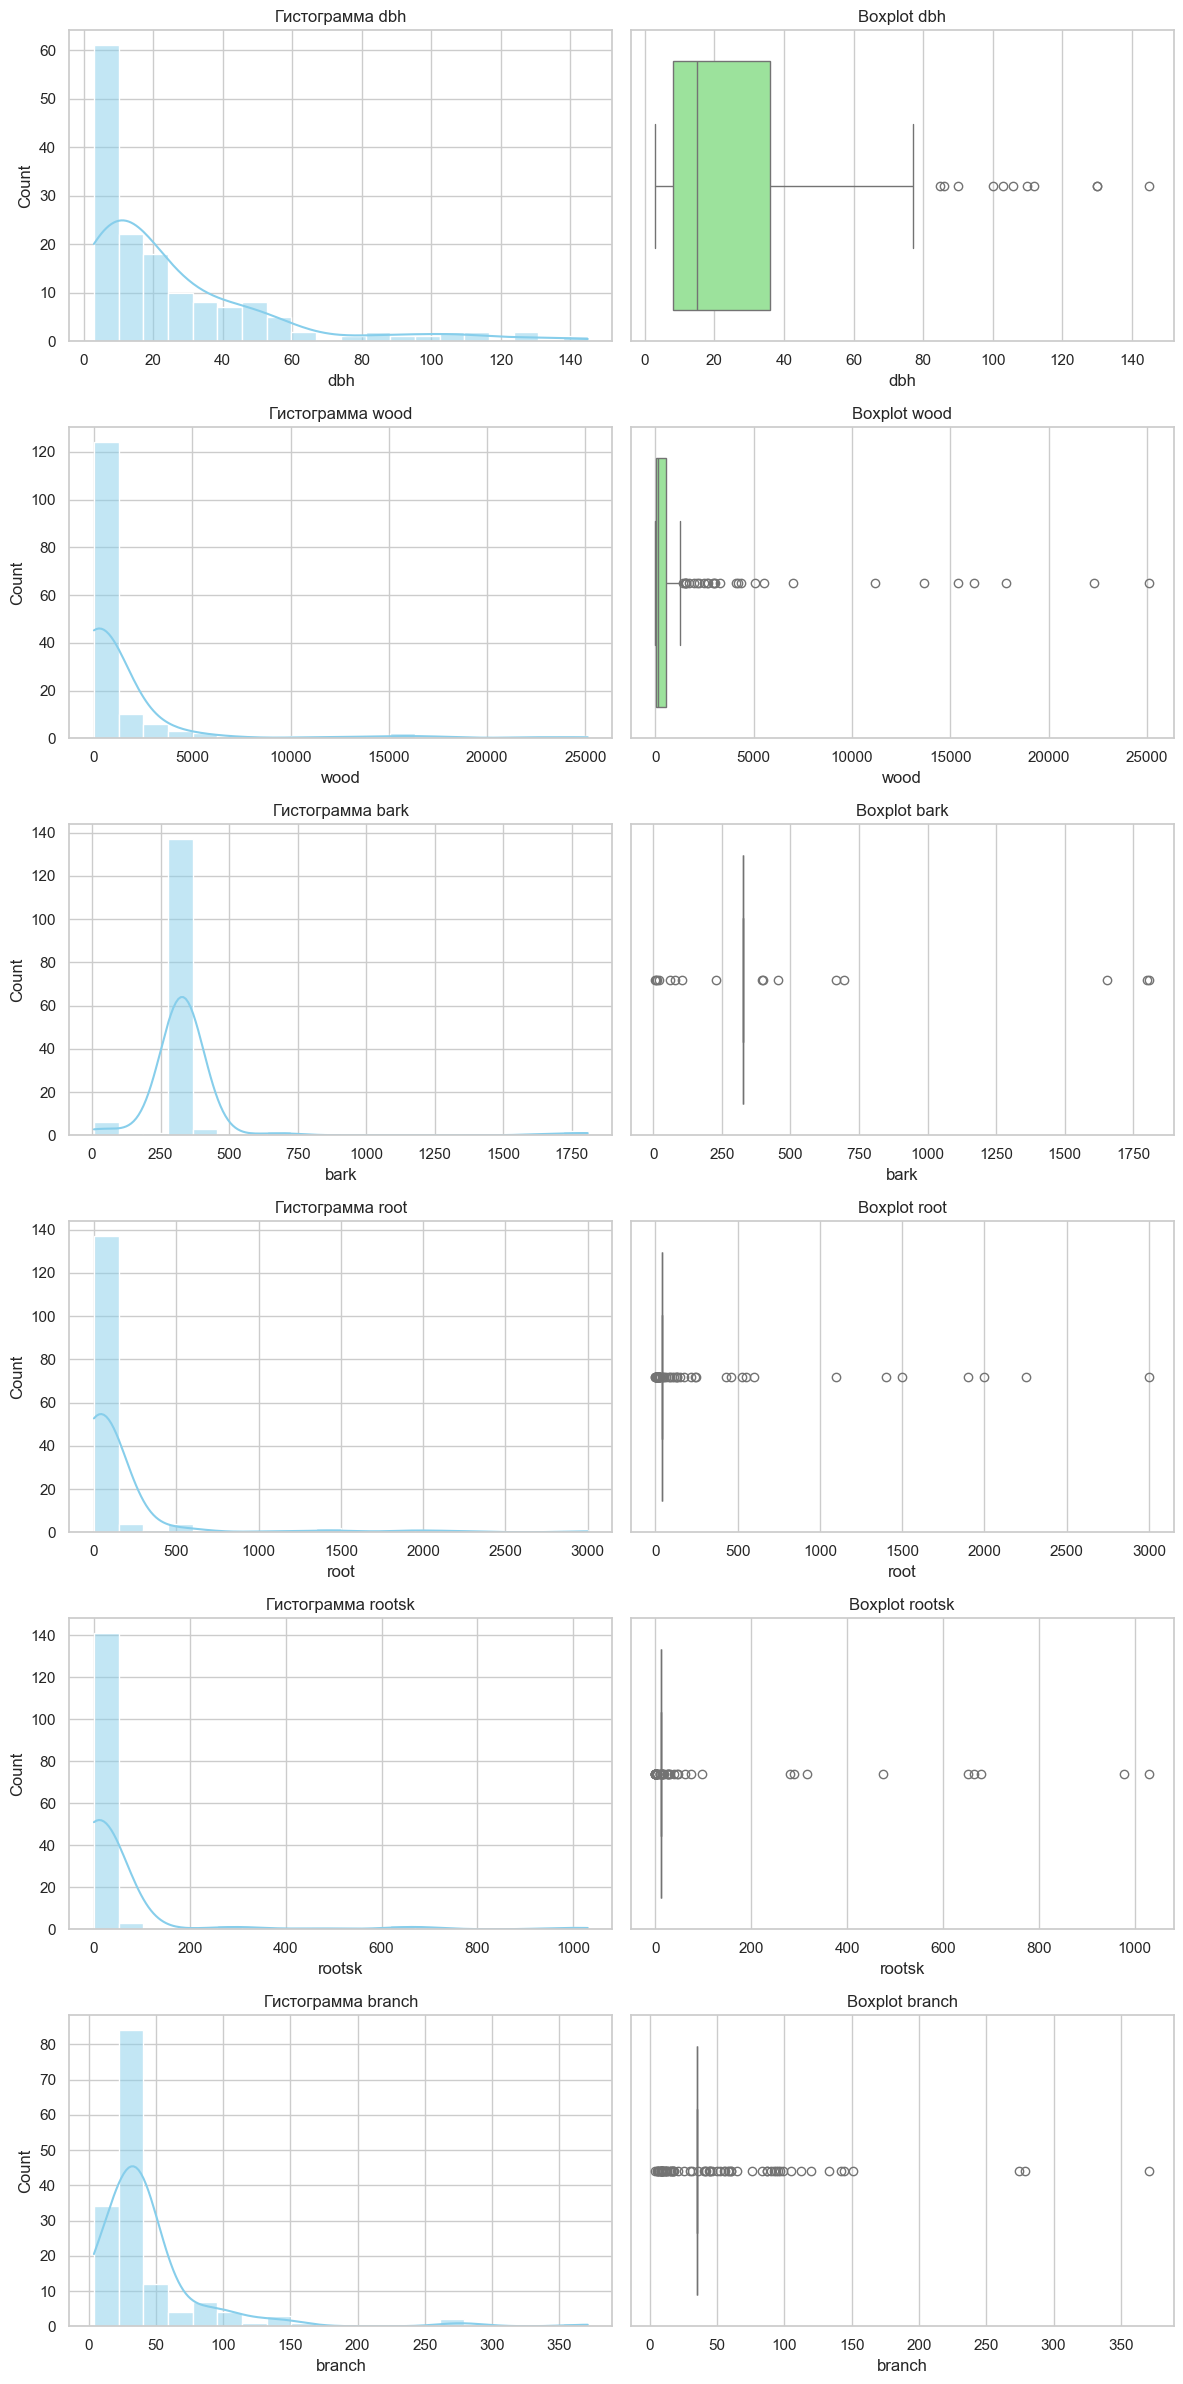

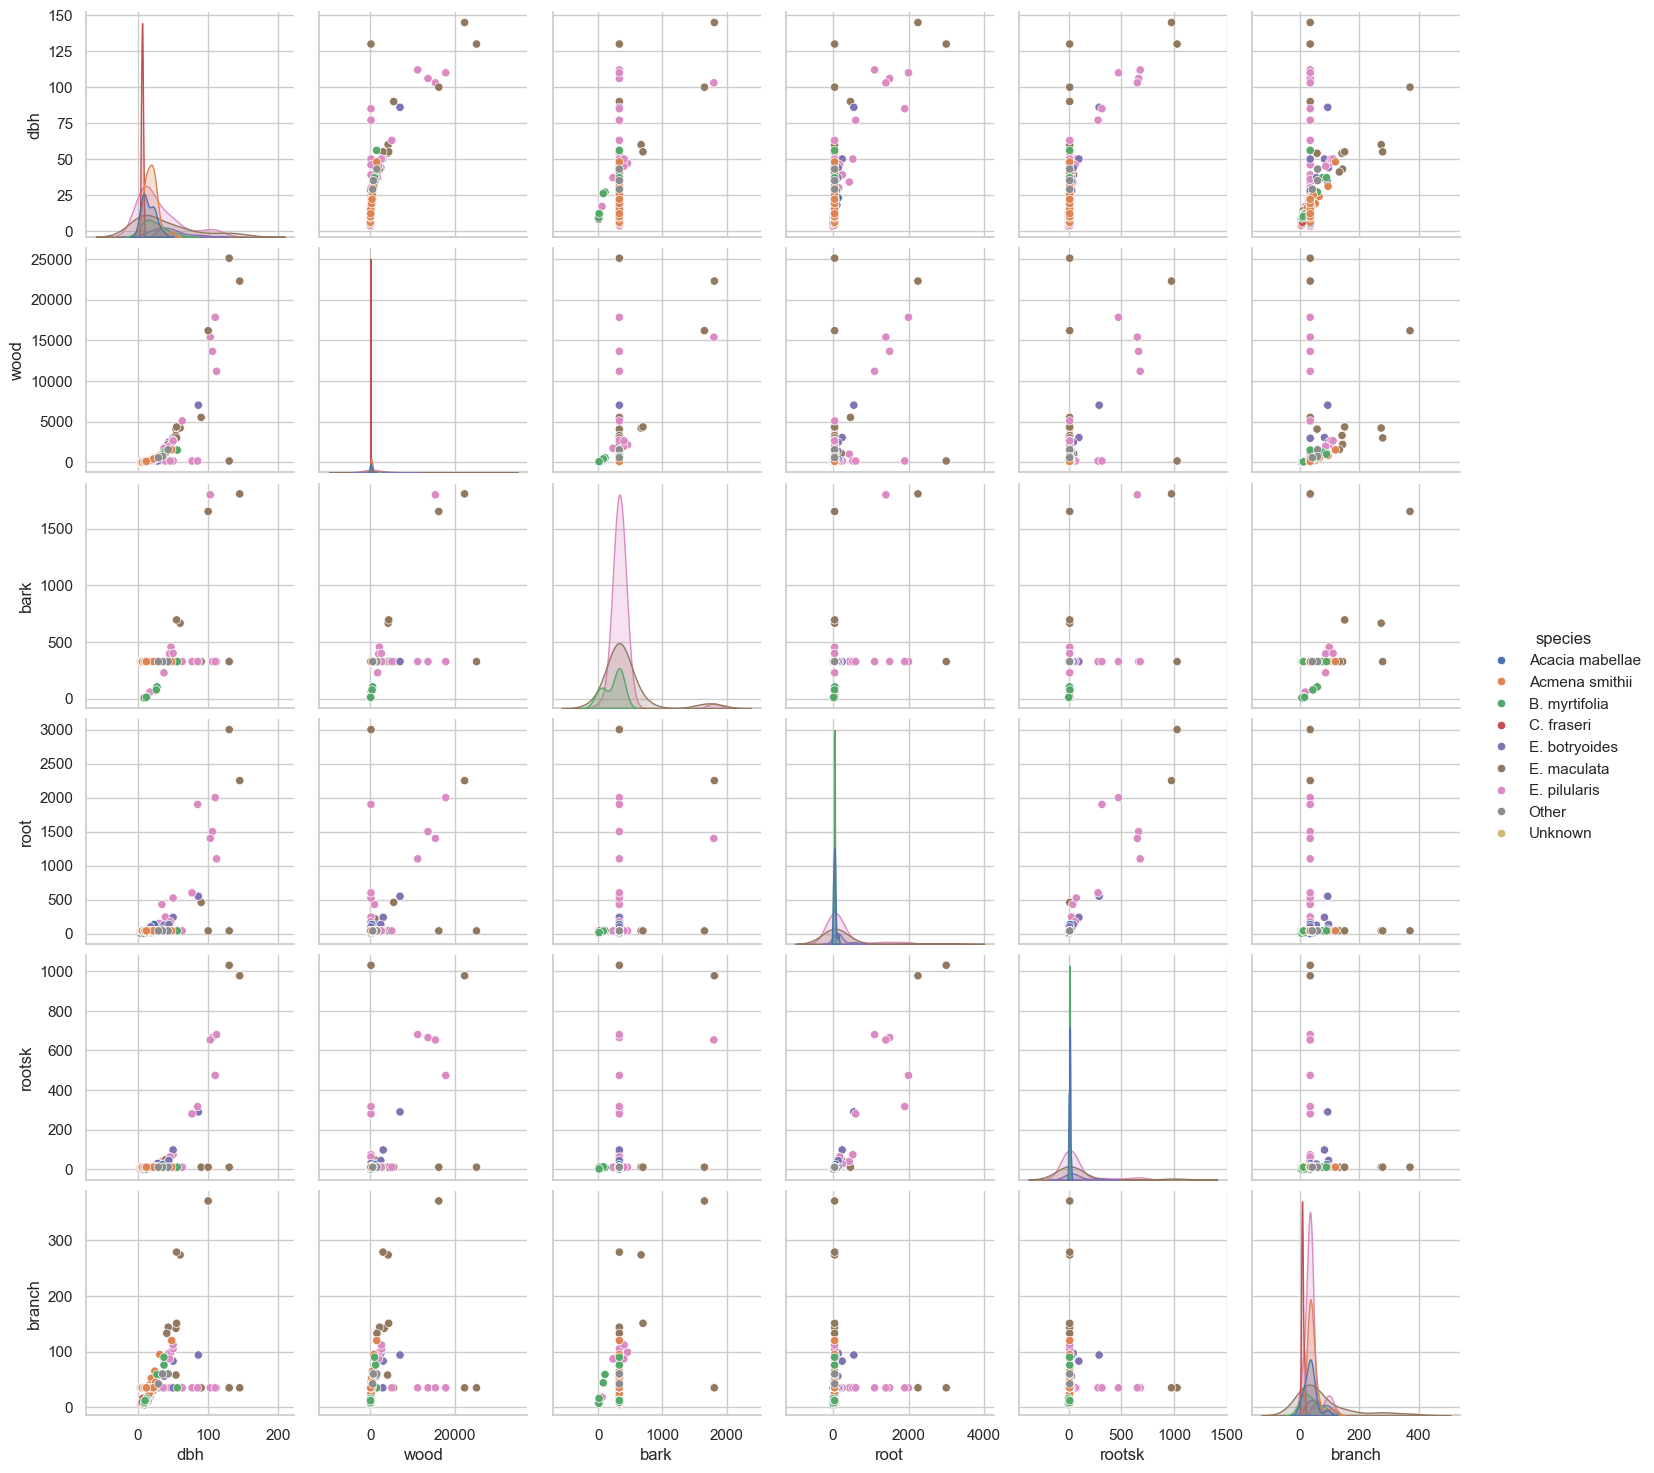

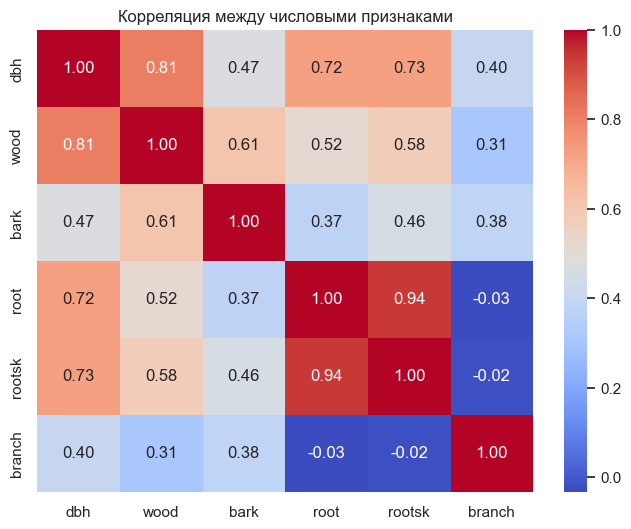

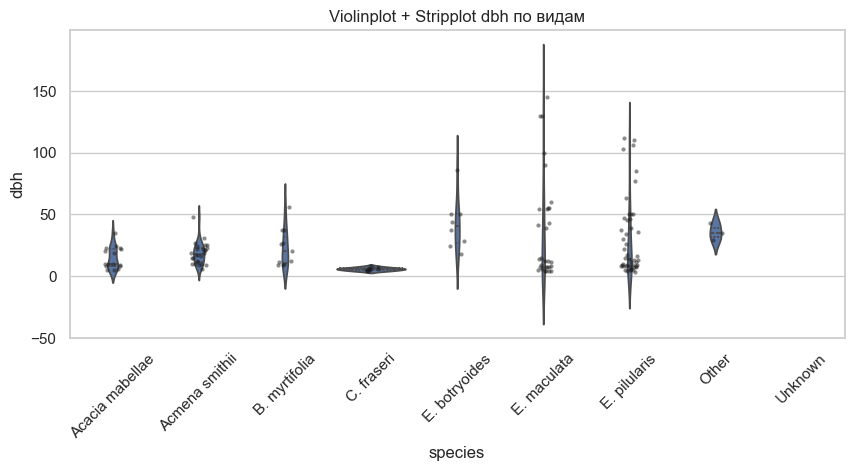

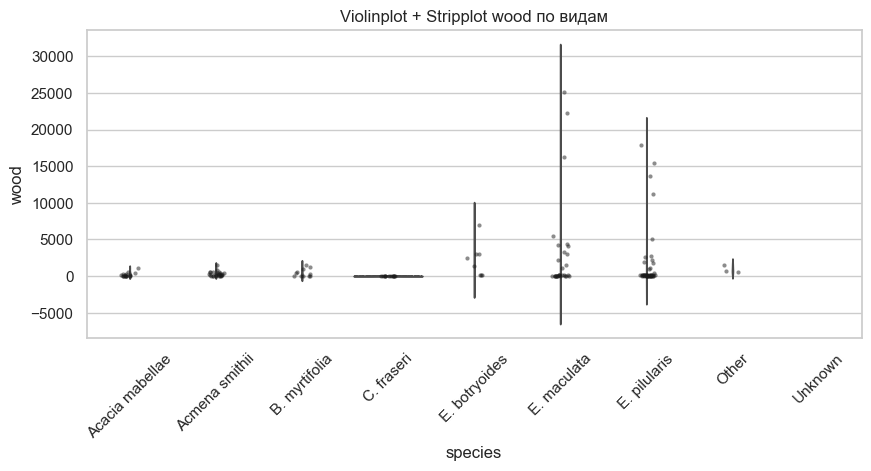

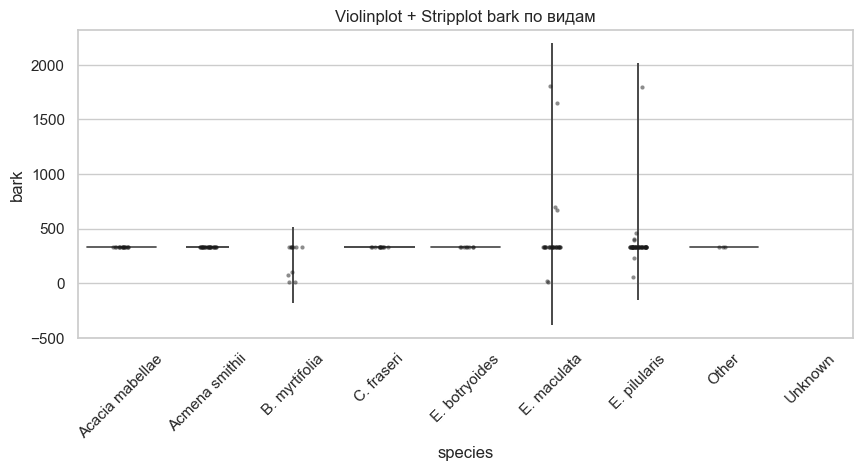

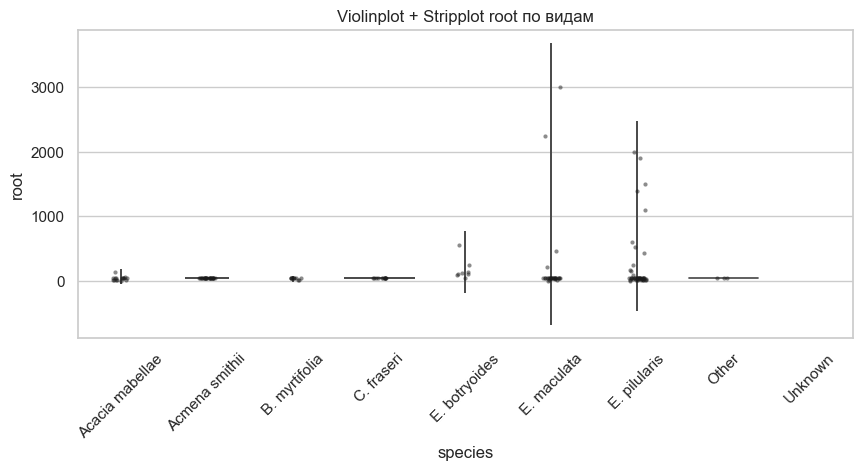

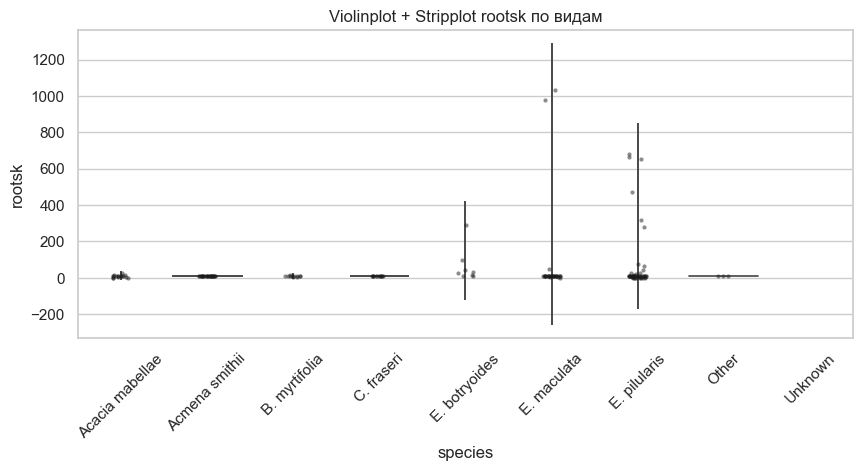

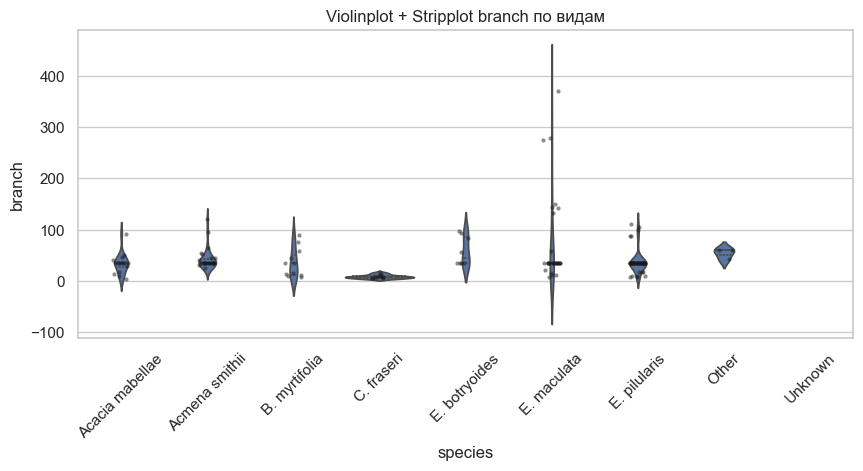

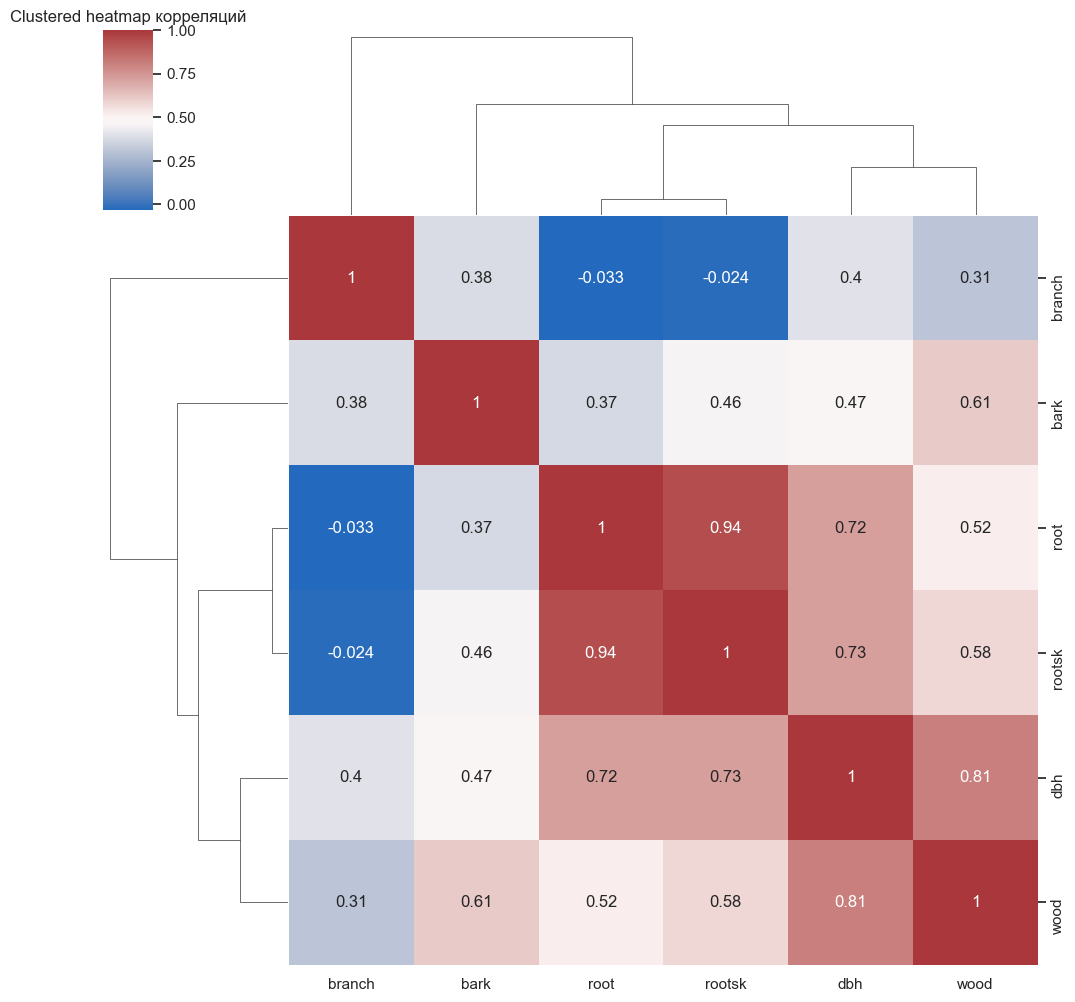

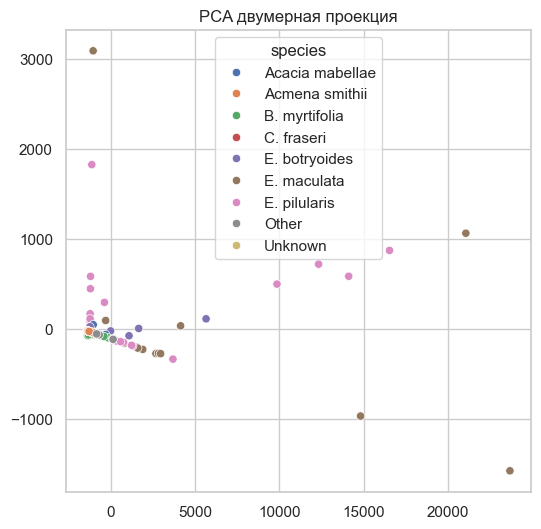

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from data_loader import load_data
from sklearn.decomposition import PCA

%matplotlib inline
sns.set(style="whitegrid")

df = load_data()
if df is None:
    raise ValueError("Ошибка загрузки данных")

numeric_cols = ['dbh', 'wood', 'bark', 'root', 'rootsk', 'branch']
categorical_cols = ['species', 'fac26']

print("Размер датафрейма:", df.shape)
display(df.head())

print(df.describe(include='all'))
print("Пропущенные значения (число):", df.isna().sum().sum())
print("Дубликатов:", df.duplicated().sum())
print("Число уникальных значений в species:", df['species'].nunique())

n = len(numeric_cols)
fig, axes = plt.subplots(n, 2, figsize=(12, 4*n))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[2*i], color='skyblue')
    axes[2*i].set_title(f'Гистограмма {col}')
    sns.boxplot(x=df[col], ax=axes[2*i+1], color='lightgreen')
    axes[2*i+1].set_title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

try:
    sns.pairplot(df[numeric_cols + ['species']], hue='species', diag_kind='kde')
    plt.show()
except Exception as e:
    print("Pairplot ошибка:", e)

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между числовыми признаками')
plt.show()

for col in numeric_cols:
    plt.figure(figsize=(10,4))
    sns.violinplot(x='species', y=col, data=df, inner='quart')
    sns.stripplot(x='species', y=col, data=df, color='k', alpha=0.5, size=3)
    plt.title(f'Violinplot + Stripplot {col} по видам')
    plt.xticks(rotation=45)
    plt.show()

sns.clustermap(df[numeric_cols].corr(), annot=True, cmap='vlag')
plt.title('Clustered heatmap корреляций')
plt.show()

pca = PCA(n_components=2)
coords = pca.fit_transform(df[numeric_cols].fillna(0))
plt.figure(figsize=(6,6))
sns.scatterplot(x=coords[:,0], y=coords[:,1], hue=df['species'])
plt.title('PCA двумерная проекция')
plt.show()